<div style="display: flex; align-items: center;">
    <h1>Libraries Installer</h1>
    <img src="./images/download.png" alt="download" width="100" height="auto" style="vertical-align: middle;"/>
</div>
<p>
    libraries.py will instal all the libraries specified inside this module. Specifically, it will update pip and install all the modules specified inside libraries list.
</p>

In [1]:
!python libraries.py

2025-03-28 21:19:21,981 - INFO - Upgrading pip...
2025-03-28 21:19:22,000 - INFO - Running pip command: install --upgrade pip
2025-03-28 21:19:35,992 - INFO - Command 'install --upgrade pip' executed successfully.
2025-03-28 21:19:35,992 - INFO - pip upgraded successfully.
2025-03-28 21:19:35,992 - INFO - Installing library numpy...
2025-03-28 21:19:35,992 - INFO - Running pip command: install numpy
2025-03-28 21:19:37,622 - INFO - Command 'install numpy' executed successfully.
2025-03-28 21:19:37,622 - INFO - numpy installed successfully.
2025-03-28 21:19:37,622 - INFO - Installing library pandas...
2025-03-28 21:19:37,622 - INFO - Running pip command: install pandas
2025-03-28 21:19:39,295 - INFO - Command 'install pandas' executed successfully.
2025-03-28 21:19:39,295 - INFO - pandas installed successfully.
2025-03-28 21:19:39,295 - INFO - Installing library matplotlib...
2025-03-28 21:19:39,295 - INFO - Running pip command: install matplotlib
2025-03-28 21:19:40,996 - INFO - Comman

<h1>
    Devices Check
</h1>
<div style="text-align: center;">
    <img src="./images/devices.webp" alt="devices" width="700"/>
</div>
<p>
    It checks if GPU is available. Then it will print which devices you can use.
</p>

In [2]:
import tensorflow as tf
print(f'tf.config.list_physical_devices("GPU") = {tf.config.list_physical_devices("GPU")}')

tf.config.list_physical_devices("GPU") = []


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 12328149897558083101
xla_global_id: -1
]


In [4]:
import os
import numpy as np
import pandas as pd
import utils
import custom

# Metrics used for Models Evaluation

This list will be used later to evaluate trained models metrics. Specifically, the metrics used for models evaluation are:

- **Max Error:**  
$$
\text{Max Error} = \max_i |Y_i - \hat{Y_i}|
$$

- **Mean Absolute Error (MAE):**  
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |Y_i - \hat{Y_i}|
$$

- **Mean Absolute Percentage Error (MAPE):**  
$$
\text{MAPE} = 100 \cdot \frac{1}{n} \sum_{i=1}^{n} \left( \frac{|Y_i - \hat{Y_i}|}{Y_i} \right)
$$

- **Mean Squared Error (MSE):**  
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
$$

- **Root Mean Squared Error (RMSE):**  
$$
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2}
$$

- **Root Mean Squared Log Error (RMSLE):**  
$$
\text{RMSLE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left( \log(1 + Y_i) - \log(1 + \hat{Y_i}) \right)^2}
$$


In [5]:
metrics = []



# Adaptive H-Infinity Filter

**AHIF** is a simplified Adaptive H-Infinity Filter based on Kalman gain. It is used later to filter out noisy SOC estimates predicted by trained models.

- The **process variance** is initially small because it represents model uncertainty.  
  At the beginning, it is assumed that the model is very accurate and, therefore, the variance is set to a low value.  
  This parameter will be adapted every **10 measurements** because 10 residuals are enough statistical information to predict model variance correctly.  
  Specifically, if the residuals are highly variable, the model is inaccurate. If they are low constant values, the model variance can be reduced.

- The **measurement variance** is set to a high value because it is assumed that measurements from sensors are very noisy.

- The **initial error covariance** is initially set to **1** (high uncertainty) because, at first, it is assumed that there is high measurement uncertainty.

- The **Kalman gain** represents how much we can trust the measurement versus the prediction.  
  If the measurement is very noisy (high measurement variance/uncertainty), the Kalman gain will be low, favoring the prediction.

$$
KG = \frac{ \text{PEC} }{ \text{PEC} + \text{MV} }
$$

Where:
  - **KG** → Kalman gain  
  - **PEC** → Predicted error covariance  
  - **MV** → Measurement variance  

- The **error covariance** is updated with newly acquired information.  
  The more data collected, the higher the prediction confidence (Bayesian Filter principles).


In [6]:
ahif = custom.AHIF()

INFO:root:Initialized AHIF with process_variance=1e-05, measurement_variance=0.1, initial_estimate=0, initial_error_covariance=1


<div style="display: flex; align-items: center;">
    <h1>Dataset</h1>
    <img src="./images/dataset.png" alt="dataset" width="140" height="auto" style="vertical-align: middle;"/>
</div>
<p>
    You can find the full dataset at the following link: <a href="https://doi.org/10.17632/cp3473x7xv.3">LG 18650HG2 Li-ion Battery Data</a>
    <blockquote>
        The included tests were performed at McMaster University in Hamilton, Ontario, Canada by Dr. Phillip Kollmeyer.
    </blockquote>
</p>
Specifically, a class is designed to obtain automatically, through get_dataset() method, normalized arrays. In particular, these arrays represents training, validation and testing features and target. The dataset directory is specified as data path in the costructor where it is assumed that it contains 'train', 'val' and 'test' subdirectories.

In [7]:
import dataset

data = dataset.LGHG2(data_dir='./data')
X_train, X_val, X_test, y_train, y_val, y_test = data.get_dataset()

INFO:root:./data = ['test', 'train', 'val']
INFO:root:./data\train = ['TRAIN_LGHG2@n10degC_to_25degC_Norm_5Inputs.csv']
INFO:root:./data\val = ['01_TEST_LGHG2@n10degC_Norm_(05_Inputs).csv', '02_TEST_LGHG2@0degC_Norm_(05_Inputs).csv', '03_TEST_LGHG2@10degC_Norm_(05_Inputs).csv']
INFO:root:./data\test = ['04_TEST_LGHG2@25degC_Norm_(05_Inputs).csv']
INFO:root:train_data_df loaded.
INFO:root:val_data_df loaded.
INFO:root:test_data_df loaded.
INFO:root:data_columns = Index(['V', 'I', 'Temp', 'V_avg', 'I_avg', 'SOC'], dtype='object')
INFO:root:features = ['V', 'I', 'Temp', 'V_avg', 'I_avg']
INFO:root:target = ['SOC']


In [8]:
'''
Call the get_dfs() method to retrieve the loaded DataFrames for training, validation, and testing.
The method returns the DataFrames containing the raw data for each dataset, which are then assigned 
to the variables train_data_df, val_data_df, and test_data_df, respectively.
'''
train_data_df, val_data_df, test_data_df = data.get_dfs()

In [9]:
train_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.385148,0.75102,0.303101,0.385148,0.75102,0.206417
1,0.385152,0.75102,0.304591,0.385150,0.75102,0.206417
2,0.385156,0.75102,0.306081,0.385152,0.75102,0.206417
3,0.385160,0.75102,0.307572,0.385154,0.75102,0.206417
4,0.385164,0.75102,0.309062,0.385156,0.75102,0.206417
...,...,...,...,...,...,...
669951,0.478843,0.75102,0.008477,0.459558,0.75102,0.283243
669952,0.478843,0.75102,0.008477,0.459699,0.75102,0.283243
669953,0.478843,0.75102,0.008477,0.459839,0.75102,0.283243
669954,0.478961,0.75102,0.008477,0.459979,0.75102,0.283243


<p>
    Using isna().sum() method on the DataFrame we will count the number of missing values in each column.
</p>

In [10]:
train_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

<p>
    Using info() method on the DataFrame we will get a coincise summary of it, including the number of non-null entries, data types of each column, and memory usage.
</p>

In [11]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669956 entries, 0 to 669955
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       669956 non-null  float64
 1   I       669956 non-null  float64
 2   Temp    669956 non-null  float64
 3   V_avg   669956 non-null  float64
 4   I_avg   669956 non-null  float64
 5   SOC     669956 non-null  float64
dtypes: float64(6)
memory usage: 30.7 MB


In [12]:
val_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.967308,0.749218,0.005644,0.967308,0.749218,1.000000
1,0.957333,0.746992,0.005644,0.962321,0.748105,0.999990
2,0.953690,0.747098,0.005644,0.959444,0.747769,0.999983
3,0.952046,0.747098,0.005644,0.957594,0.747602,0.999973
4,0.951106,0.747098,0.005644,0.956297,0.747501,0.999963
...,...,...,...,...,...,...
126102,0.335128,0.751020,0.532568,0.329741,0.751020,0.194990
126103,0.335128,0.751020,0.532568,0.329778,0.751020,0.194990
126104,0.335128,0.751020,0.532568,0.329815,0.751020,0.194990
126105,0.335128,0.751020,0.532568,0.329851,0.751020,0.194990


In [13]:
val_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [14]:
val_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126107 entries, 0 to 126106
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V       126107 non-null  float64
 1   I       126107 non-null  float64
 2   Temp    126107 non-null  float64
 3   V_avg   126107 non-null  float64
 4   I_avg   126107 non-null  float64
 5   SOC     126107 non-null  float64
dtypes: float64(6)
memory usage: 5.8 MB


In [15]:
test_data_df

,V,I,Temp,V_avg,I_avg,SOC
0,0.966960,0.748900,0.920678,0.966960,0.748900,1.000000
1,0.966020,0.746992,0.920677,0.966490,0.747946,0.999990
2,0.965901,0.746992,0.917845,0.966294,0.747628,0.999983
3,0.965783,0.747098,0.917845,0.966166,0.747496,0.999973
4,0.965665,0.746992,0.917845,0.966066,0.747395,0.999963
...,...,...,...,...,...,...
47512,0.298614,0.751020,0.926344,0.292723,0.751020,0.136623
47513,0.298614,0.751020,0.926344,0.292761,0.751020,0.136623
47514,0.298614,0.751020,0.926344,0.292798,0.751020,0.136623
47515,0.298614,0.751020,0.929177,0.292834,0.751020,0.136623


In [16]:
test_data_df.isna().sum()

V        0
I        0
Temp     0
V_avg    0
I_avg    0
SOC      0
dtype: int64

In [17]:
test_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47517 entries, 0 to 47516
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V       47517 non-null  float64
 1   I       47517 non-null  float64
 2   Temp    47517 non-null  float64
 3   V_avg   47517 non-null  float64
 4   I_avg   47517 non-null  float64
 5   SOC     47517 non-null  float64
dtypes: float64(6)
memory usage: 2.2 MB


<h2>
    Training, Validation and Testing Distribution
</h2>
<p>
    A pie chart is used to visualize the distribution of the dataset among training, validation, and test sets.
</p>

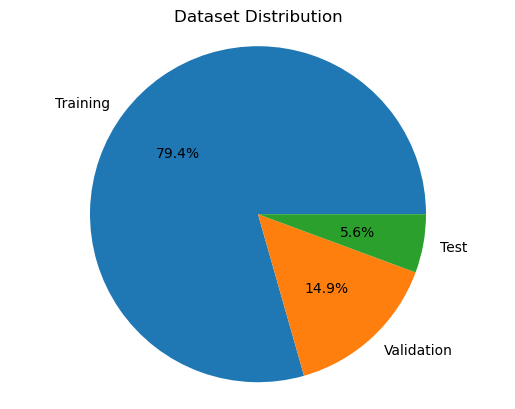

In [18]:
utils.pie_chart_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

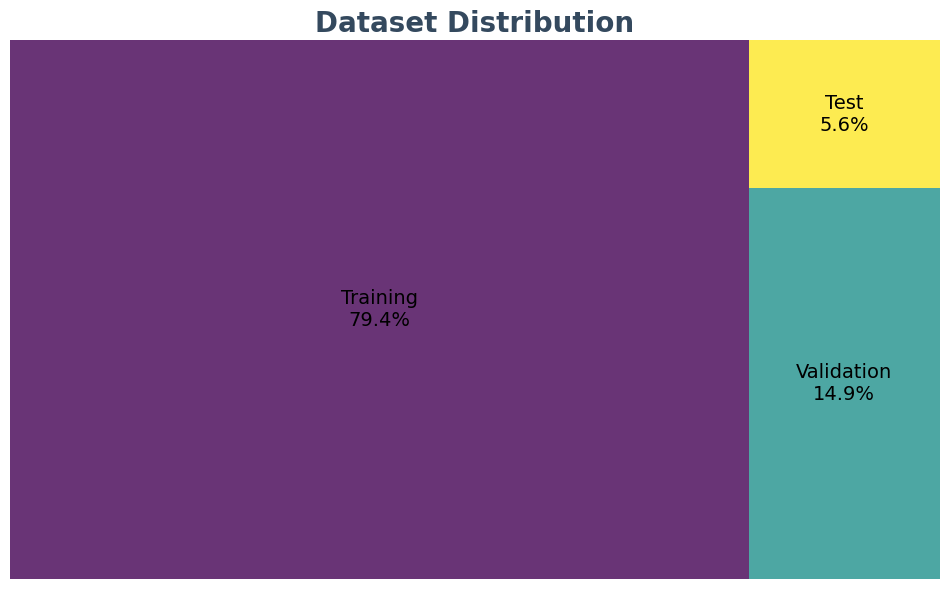

In [19]:
import utils
utils.treemap_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

<h2>
    Features and Target Distribution through Training, Validation and Testing Datasets
</h2>
<p>
    Violin plots are used to visualize the distribution of features for training, validation, and test datasets.
</p>

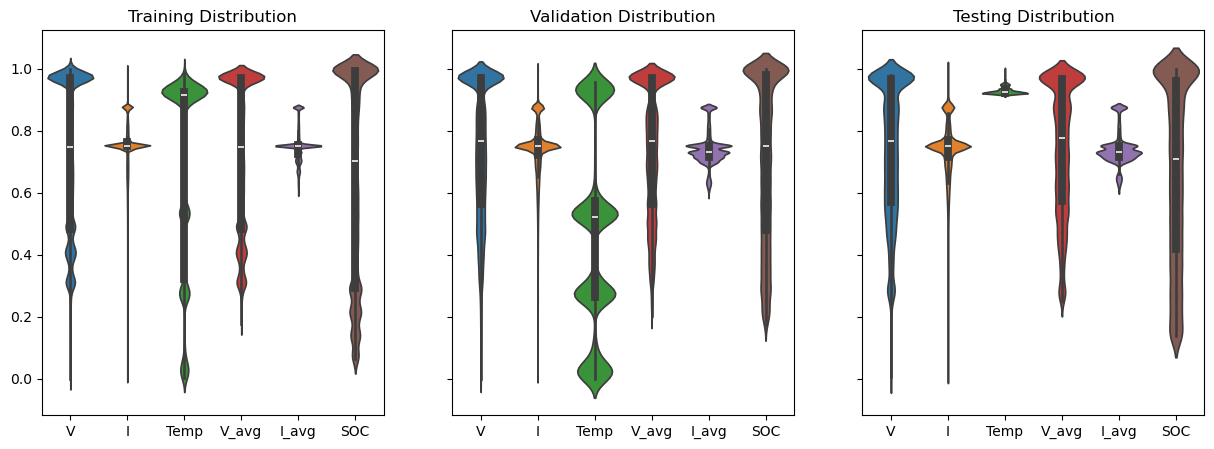

In [20]:
utils.violin_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

<h2>
    Features and Target Histograms
</h2>
<p>
    Histograms are used to visualize the distribution of each feature for training, validation, and test datasets.
</p>

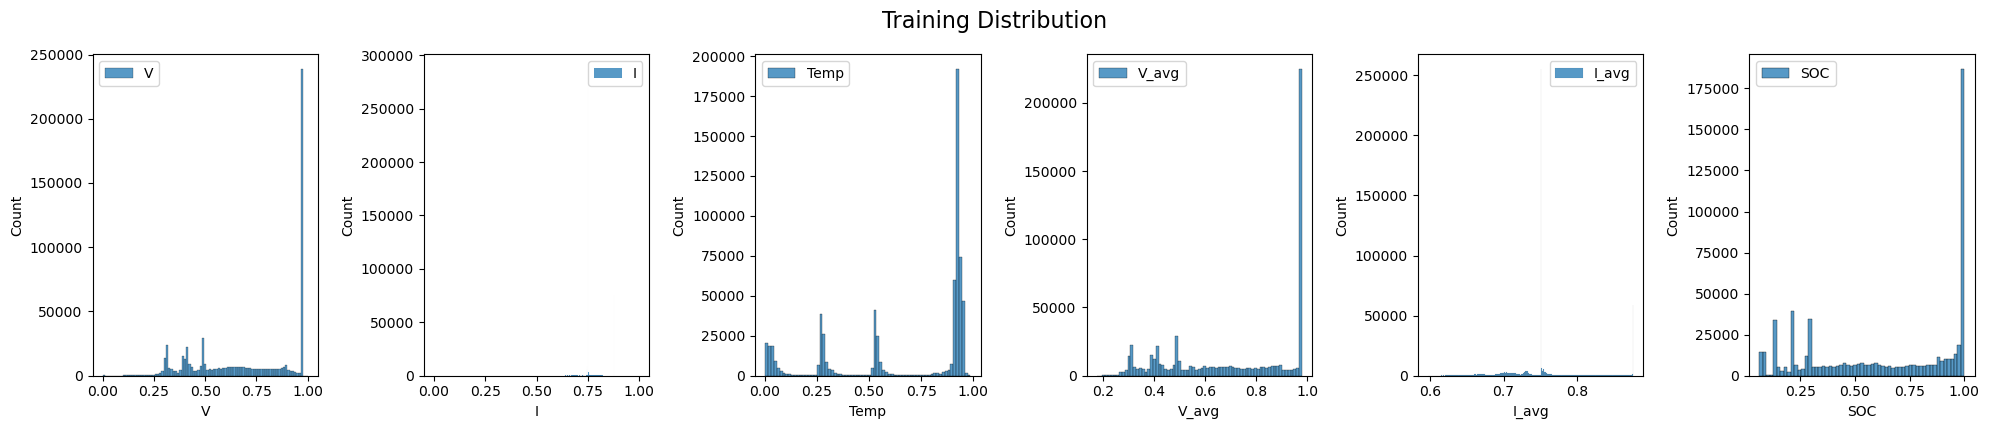

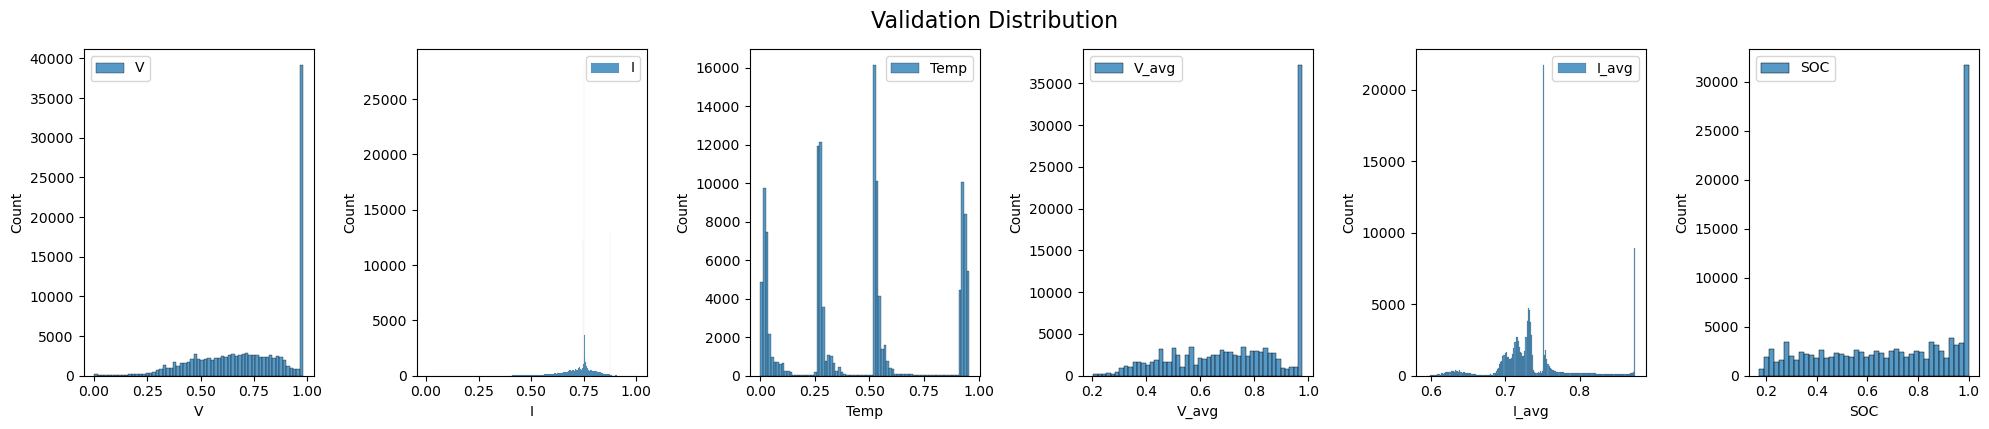

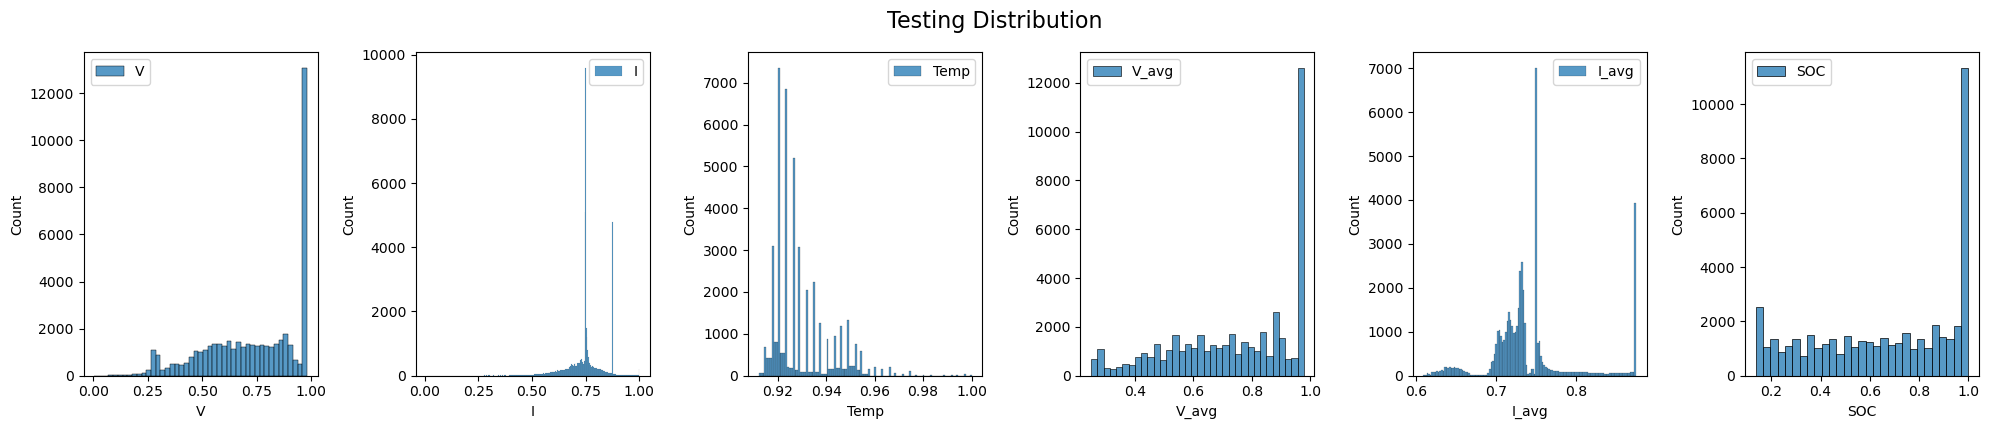

In [21]:
utils.hist_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

<h2>
    Time Series
</h2>
<p>
    Line plots are used to visualize time series data for training, validation, and test datasets.
</p>

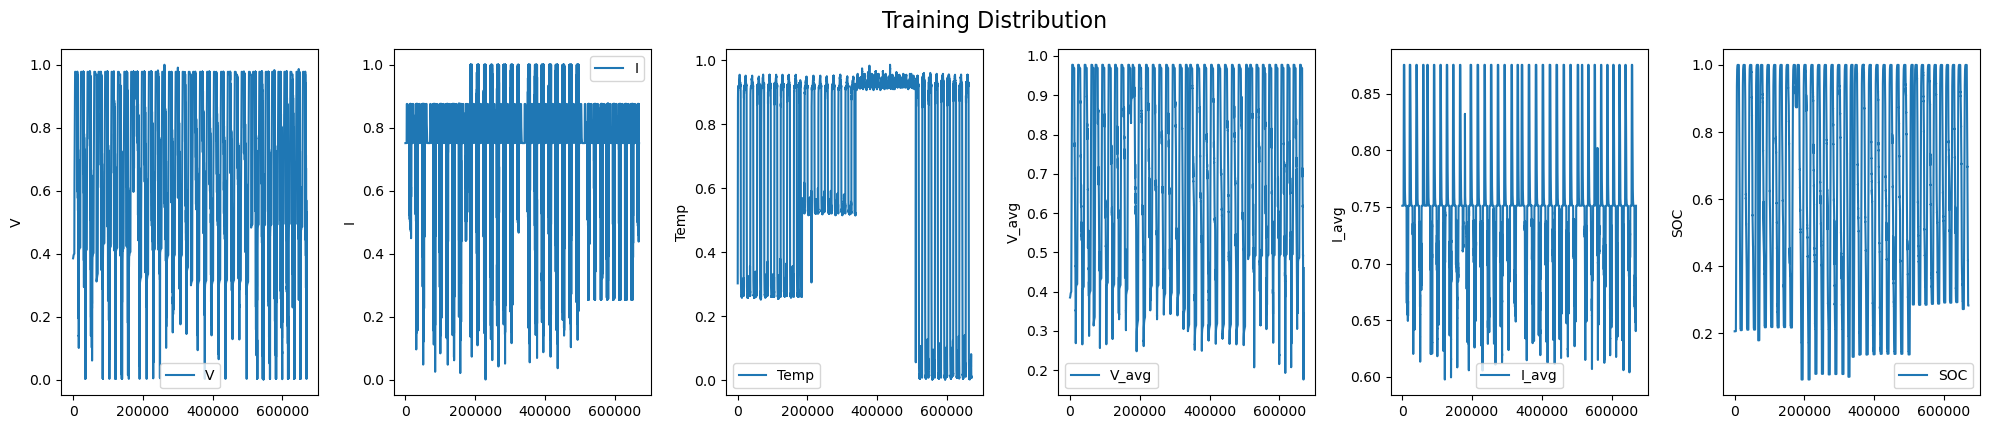

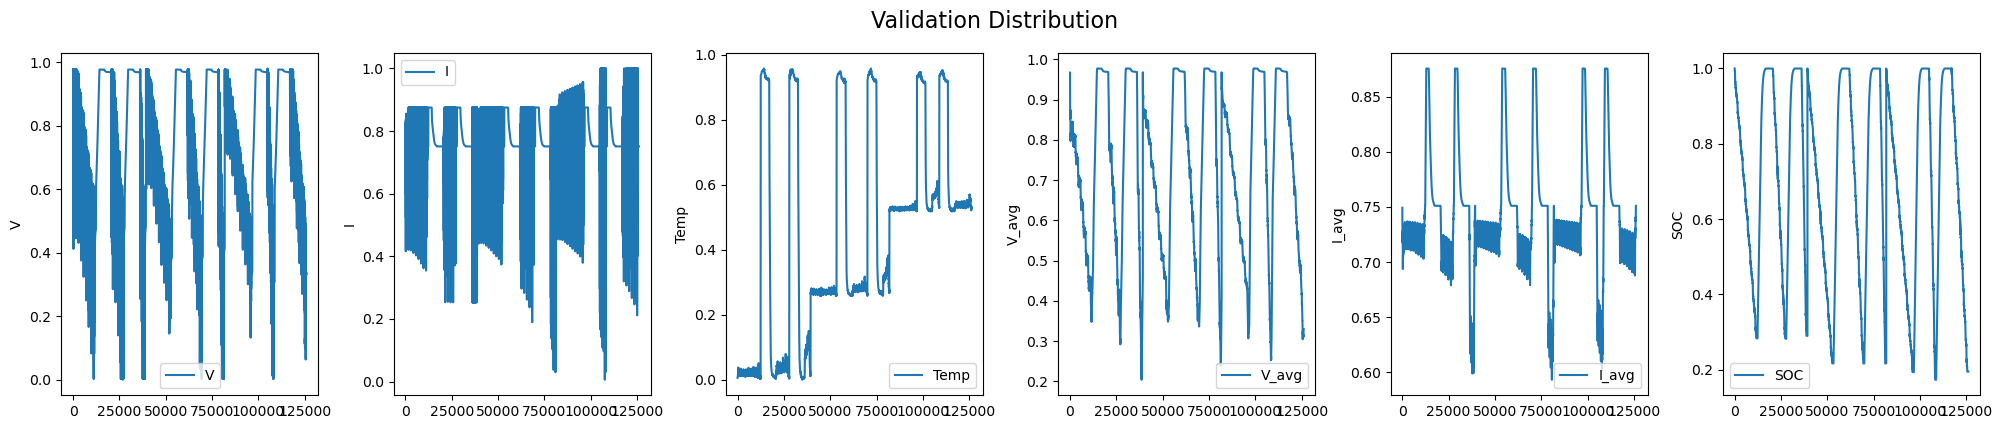

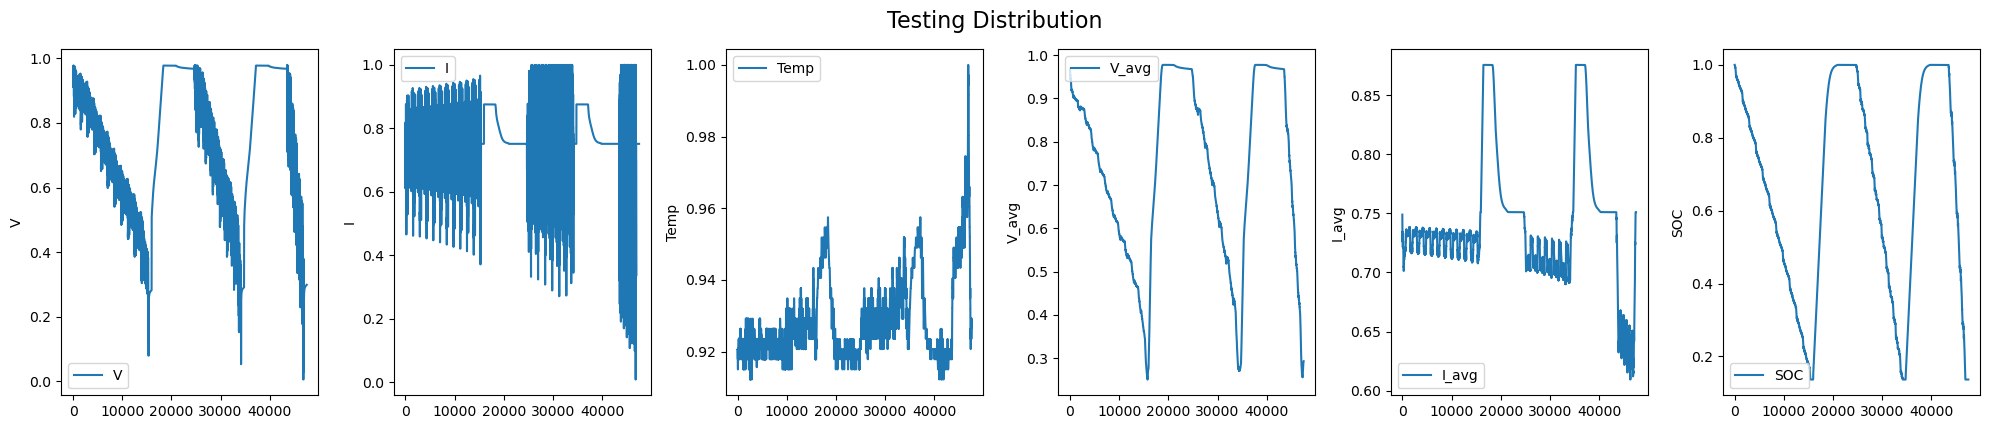

In [22]:
utils.time_series_plot(
    train_data_df=train_data_df, 
    val_data_df=val_data_df, 
    test_data_df=test_data_df
)

<h2>
    Correlation Matrix
</h2>
<p>
    A heatmap is used to visualize the correlation matrix of the features in the dataset.
</p>

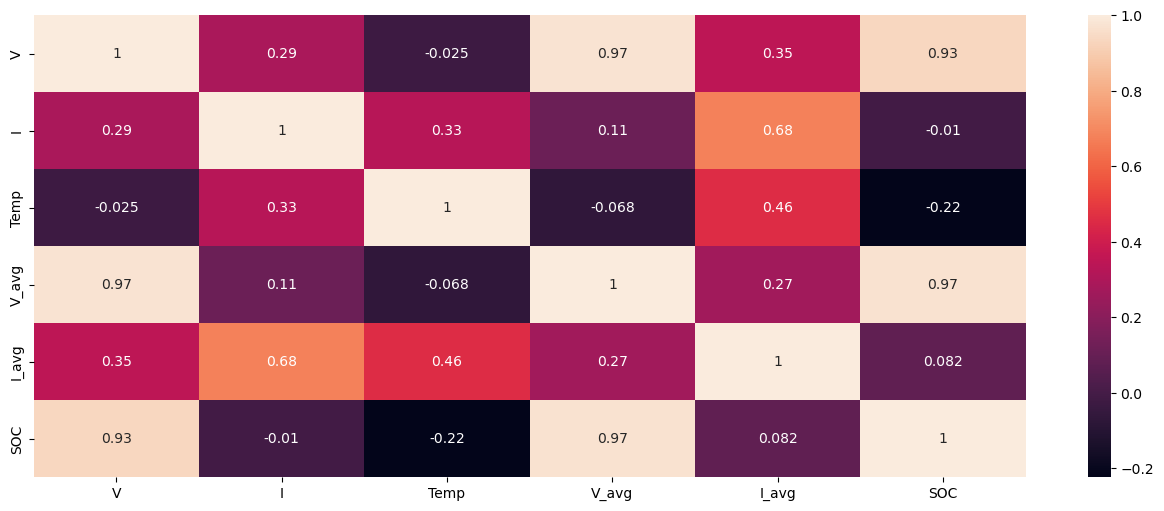

In [23]:
utils.correlation_map(data_df=train_data_df)

# MLP-FNN

A **FeedForward Neural Network (FNN)** is one of the simplest artificial neural networks used in the AI field. It is named 'feed-forward' because data flows in one direction without loops and feedback. In particular, there are no recurrent connections, which distinguishes it from **RNN (Recurrent Neural Network)** where data can flow backward. 

Specifically, a **Multilayer Perceptron (MLP)** is an FNN with at least one hidden layer between the input and output layers. This network is very useful for learning non-linear relationships.  

![MLP-FNN Example](./images/mlpfnn.svg)

Specifically, a class is designed to instantiate, build, and compile an MLP-FNN model where the input shape is equal to 5, i.e., 5 features (**V, V_avg, I, I_avg, Temp**), and the output shape is equal to 1, i.e., 1 target (**SOC**). 

In particular, this architecture consists of:
- **1 input layer** with 5 neurons  
- **3 hidden layers** with 256, 256, and 128 neurons, respectively  
- **1 output layer** with 1 neuron  

![Custom MLP-FNN model](./images/fnn_model.keras.svg)

---

### **Activation Functions**
The hidden layers use different activation functions:
- **ReLU (Rectified Linear Unit)** for the first two hidden layers (256 neurons each)  
- **Leaky ReLU** for the third hidden layer (128 neurons)  
- **Clipped ReLU** for the output layer  

#### **ReLU:**
$$
\text{ReLU}(x) = 
\begin{cases} 
x & \text{if } x > 0 \\ 
0 & \text{if } x \leq 0 
\end{cases}
$$

#### **Leaky ReLU:**
$$
\text{Leaky ReLU}(x) = 
\begin{cases} 
x & \text{if } x > 0 \\ 
\alpha \cdot x & \text{if } x \leq 0 
\end{cases} 
$$

Where:
- $ \alpha $ is the negative slope that allows a small gradient to pass through even for negative values, avoiding the "dying ReLU problem."

#### **Clipped ReLU:**
$$
\text{Clipped ReLU}(x) = 
\begin{cases} 
0 & \text{if } x < 0 \\
x & \text{if } 0 \leq x < 1 \\
1 & \text{if } x \geq 1 
\end{cases} 
$$

---

### **Optimizer: Stochastic Gradient Descent (SGD)**  
The optimizer chosen for the model is **SGD**, which updates architecture weights to decrease the error.

$$
w_{ij} = w_{ij} - \eta \frac{\delta L}{\delta w_{ij}}
$$

Where:
- $ \eta $ is the learning rate controlling the update rate  
- $ \frac{\delta L}{\delta w_{ij}} $ is the gradient of the loss function with respect to the weight  

---

### **Decay Algorithm: Exponential Decay**
The decay algorithm used is **Exponential Decay**, which stabilizes the optimization process. The learning rate at each epoch \(t\) is updated according to:

$$
\eta_t = \eta_0 \cdot e^{-\lambda t}
$$

Where:
- $ \eta_0 $ is the initial learning rate  
- $ \lambda $ is the decay constant  
- $ t $ is the number of epochs  

---

### **Loss Function: Mean Squared Error (MSE)**  
The loss function used to evaluate the model is **MSE**, aiming to minimize the difference between predicted and actual values.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (Y_i - \hat{Y_i})^2
$$


In [24]:
from tensorflow import keras

In [25]:
fnn = custom.FNN(
    input_shape=X_train.shape[1],
    output_shape=y_train.shape[1]
)

fnn.build()
fnn.compile()

INFO:root:FNN instance created with input shape 5 and output shape 1.
INFO:root:Building the model...
INFO:root:Model built successfully.
INFO:root:Model compiled successfully.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 custom_leaky_re_lu (Custom  (None, 128)               0         
 LeakyReLU)                                                      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
           

<p>
    <strong>EarlyStopping</strong> is a useful technique for stopping model training when there is no more improvement in validation loss. This helps prevent overfitting and saves computational time.
    <ul>
        <li>monitor: Monitor the validation loss to determine when to stop training</li>
        <li>patience: The number of epochs with no improvement after which training will be stopped</li>
    </ul>
    <blockquote>This callback should be specified in the model callback list in the fit method.</blockquote>
</p>

In [26]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10
)

# Model Training

The **model training** is invoked by the `fit()` method. Specifically, this method involves the following parameters:

- **x**: Features data for training.  
- **y**: Target data for training.  
- **epochs**: The number of iterations to train the model.  
- **batch_size**: The number of samples per gradient update.  
- **validation_data**: A tuple containing features and target data for validation.  
- **callbacks**: A list of callbacks to apply during training.  
- **verbose**: The verbosity mode adopted for the `fit()` method.  

---

## 🔥 Hyper-Parameters Selection

- **Hidden Layers**: 3  
- **Hidden Nodes**: (256, 256, 128)  
- **Epochs**: 100  
- **Batch Size**: 64  


In [27]:
history = fnn.get_model().fit(
    x=X_train,
    y=y_train,
    epochs=100,
    batch_size=64,
    validation_data=(
        X_val, 
        y_val
    ),
    callbacks = [
        early_stopping
    ],
    verbose=1,
)

Epoch 1/100
10469/10469 [==============================] - 23s 2ms/step - loss: 0.0040 - val_loss: 0.0037
Epoch 2/100
10469/10469 [==============================] - 21s 2ms/step - loss: 0.0025 - val_loss: 0.0033
Epoch 3/100
10469/10469 [==============================] - 21s 2ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 4/100
10469/10469 [==============================] - 21s 2ms/step - loss: 0.0021 - val_loss: 0.0029
Epoch 5/100
10469/10469 [==============================] - 20s 2ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 6/100
10469/10469 [==============================] - 20s 2ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 7/100
10469/10469 [==============================] - 19s 2ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 8/100
10469/10469 [==============================] - 20s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 9/100
10469/10469 [==============================] - 22s 2ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 10/100
10469/10469 [====================

In [28]:
fnn_model_name = 'fnn_model.keras'
models_dir = './models'
fnn_model_path = os.path.join(models_dir, fnn_model_name)

'''
Save the trained FNN model to the specified file path.
'''
fnn.get_model().save(filepath=fnn_model_path)

In [29]:
'''
Convert the training history object into a DataFrame for easier analysis, add the epoch numbers 
to the DataFrame and display the last few rows of the DataFrame to inspect the training history.
'''
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch
history_df.tail()

,loss,val_loss,epoch
19,0.001840,0.002683,19
20,0.001837,0.002667,20
21,0.001834,0.002662,21
22,0.001832,0.002652,22
23,0.001829,0.002659,23


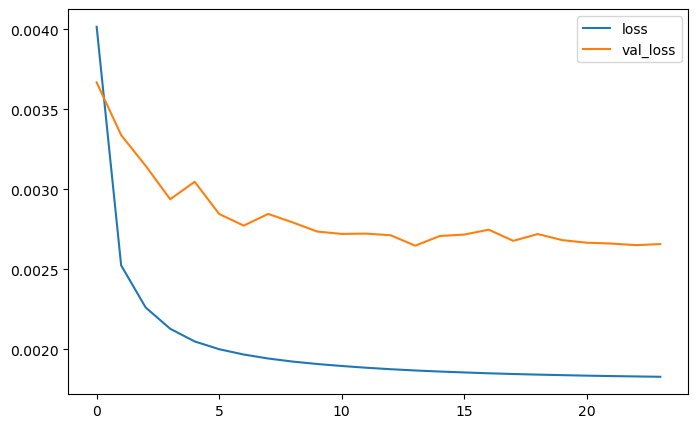

In [30]:
from matplotlib import pyplot as plt

'''
Create a DataFrame from the training history and plot the metrics.
'''
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show() 

<h2>MLP-FNN model Loading and Testing</h2>
<p>
    For testing the trained model, it is necessary to load model properly specifying custom objects (custom.CustomLeakyReLU, custom.CustomClippedReLU) defined in the trained model.
</p>

In [31]:
fnn_model_name = 'fnn_model.keras'
models_dir = './models'
fnn_model_path = os.path.join(models_dir, fnn_model_name)

fnn_model = keras.models.load_model(
    filepath=fnn_model_path, 
    custom_objects={
        'CustomLeakyReLU': custom.CustomLeakyReLU,
        'CustomClippedReLU': custom.CustomClippedReLU
    }
)

<p>
    For making predictions, it is necessary invoke the predict() method and then invoke AHIF to smooth model output data.
</p>

In [32]:
# y_predicted = fnn_model.predict(X_test)
# y_predicted_ahif = ahif.apply(
#     data=y_predicted
# )

In [33]:
# Flatten predictions to 1D array
y_predicted = fnn_model.predict(X_test).flatten()

# Apply AHIF
y_predicted_ahif = ahif.apply(data=y_predicted.tolist())


1485/1485 [==============================] - 2s 998us/step


<p>
    The model predictions evaluation is performed through evaluate() method. Furthermore, the loss value is displayed.
</p>

In [34]:
result = fnn_model.evaluate(X_test, y_test)

1485/1485 [==============================] - 2s 1ms/step - loss: 0.0010


In [35]:
fnn_metrics = utils.get_metrics(y_test, y_predicted_ahif)
metrics.append(fnn_metrics[0])
fnn_metrics[1]

,Metric,Value
0,max_error,0.192974
1,mean_absolute_error,0.020048
2,mean_absolute_percentage_error,0.054382
3,mean_squared_error,0.000935
4,root_mean_squared_error,0.030575
5,root_mean_squared_log_error,0.021900


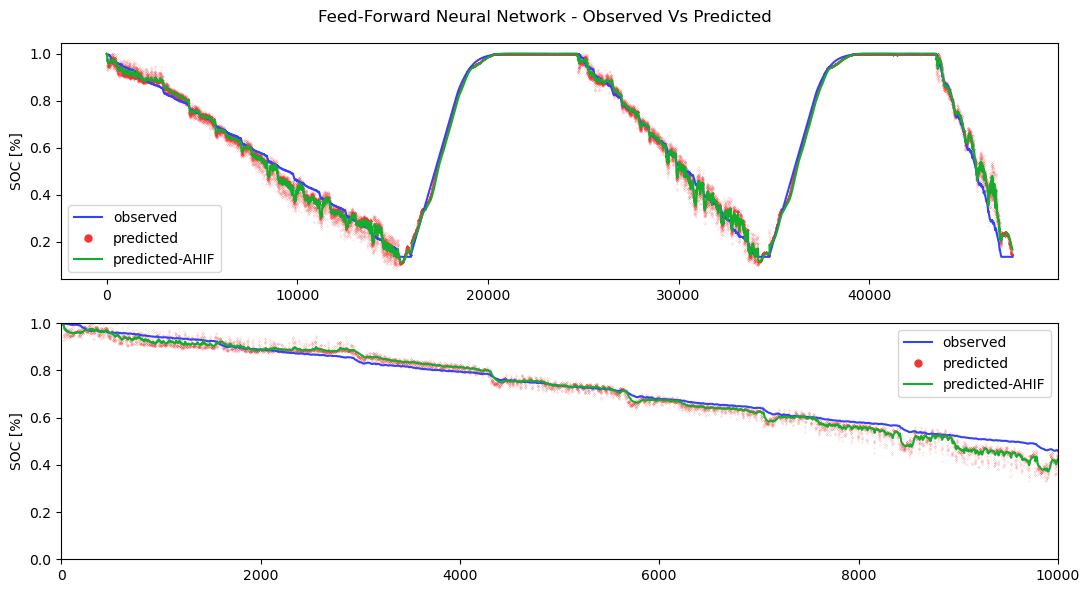

In [36]:
utils.results_plot(
    x=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    y_predicted=y_predicted, 
    y_predicted_ahif=y_predicted_ahif,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Feed-Forward Neural Network - Observed Vs Predicted'
)

In [37]:
import pickle

# Linear Regression

**Linear Regression** aims to establish a **linear relationship** between a dependent variable \( y \) and one or more independent variables \( x \).  
In other words, the model attempts to find a **linear function** that improves the prediction of \( y \) given \( x \).  

### Goal:
- The objective of Linear Regression is to find the **coefficient values** that **minimize the sum of squares of the errors**, i.e., the difference between the observed values and the predicted values by the model.

### Mathematical Representation:
$ 
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_n x_n + \epsilon
\ $

### Visualization:
<div style="text-align: center;">
    <img src="./images/lregression.png" alt="Linear Regression" width="700"/>
</div>


In [38]:
from sklearn import linear_model

lregression_model = linear_model.LinearRegression()
lregression_model.fit(
    X=X_train,
    y=y_train
)

LinearRegression()

In [39]:
lregression_model_name = 'lregression_model.sav'
models_dir = './models'
lregression_model_path = os.path.join(models_dir, lregression_model_name)

'''
Save the trained Linear Regression model to a file.
'''
pickle.dump(lregression_model, open(lregression_model_path, 'wb'))

<h2>Linear Regression model Loading and Testing</h2>
<p>
    For testing the trained model, it is necessary to load model properly.
</p>

In [40]:
lregression_model_name = 'lregression_model.sav'
models_dir = './models'
lregression_model_path = os.path.join(models_dir, lregression_model_name)

lregression_model = pickle.load(open(lregression_model_path, 'rb'))

<p>
    For making predictions, it is necessary invoke the predict() method and then invoke AHIF to smooth model output data.
</p>

In [41]:
# y_predicted = lregression_model.predict(X_test)
# y_predicted_ahif = ahif.apply(
#     data=y_predicted
# )

In [42]:
# Flatten predictions
y_predicted = lregression_model.predict(X_test).flatten()

# Apply AHIF
y_predicted_ahif = ahif.apply(data=y_predicted.tolist())


<p>
    The model predictions evaluation is performed through score() method. Furthermore, the accuracy value is displayed.
</p>

In [43]:
result = lregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 86.04%


In [44]:
lregression_metrics = utils.get_metrics(y_test, y_predicted_ahif)
metrics.append(lregression_metrics[0])
lregression_metrics[1]

,Metric,Value
0,max_error,0.253888
1,mean_absolute_error,0.087461
2,mean_absolute_percentage_error,0.192346
3,mean_squared_error,0.011819
4,root_mean_squared_error,0.108715
5,root_mean_squared_log_error,0.073253


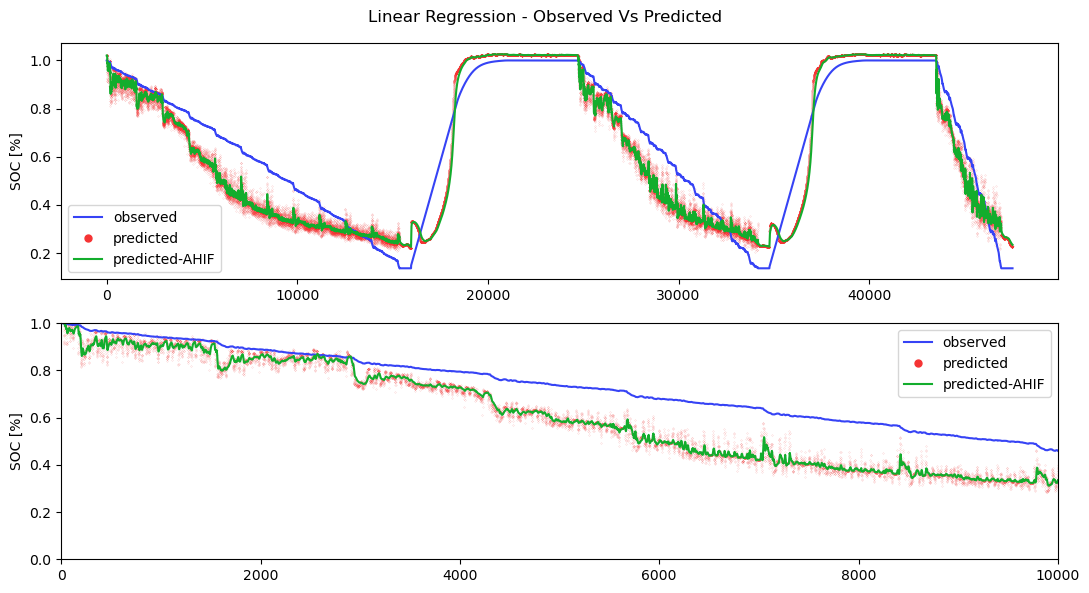

In [45]:
utils.results_plot(
    x=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    y_predicted=y_predicted,
    y_predicted_ahif=y_predicted_ahif,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Linear Regression - Observed Vs Predicted'
)

# Decision Tree Regression

**Decision Tree Regression** is a **Machine Learning technique** that uses **tree structures** to model the relationship between **independent variables** and a **dependent variable**.  

### Structure:
- A **Decision Tree** consists of:
    - **Intermediate nodes**: Split the dataset into subgroups based on specific conditions.  
    - **Branches**: Represent the possible choices leading to the next nodes.  
    - **Leaf nodes**: Provide the **final prediction** value.  

### Splitting Criterion:
- At each node, the dataset is split to minimize the **mean squared error (MSE)** or another metric.
- The formula for **MSE** at a node is:
$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y})^2
\ $
    - $ n $ → Number of samples at the node  
    - $ y_i $ → Actual values  
    - $ \hat{y} $ → Predicted value  

### Prediction Formula:
- The predicted value at a **leaf node** is the **average** of the target values in that region:
$$
\hat{y} = \frac{1}{n} \sum_{i=1}^{n} y_i
$$


### Visualization:
<div style="text-align: center;">
    <img src="./images/dtreeregression.png" alt="Decision Tree Regression" width="700"/>
</div>


In [46]:
from sklearn import tree
'''
Initialize a Decision Tree Regression model and fit the Decision Tree Regression model to the training data.
'''
decisiontree_model = tree.DecisionTreeRegressor()
decisiontree_model.fit(
    X=X_train, 
    y=y_train
)

DecisionTreeRegressor()

In [47]:
decisiontree_model_name = 'decisiontree_model.sav'
models_dir = './models'
decisiontree_model_path = os.path.join(models_dir, decisiontree_model_name)

'''
Save the trained Decision Tree Regression model to a file.
'''
pickle.dump(decisiontree_model, open(decisiontree_model_path, 'wb'))

<h2>Decision Tree Regression model Loading and Testing</h2>
<p>
    For testing the trained model, it is necessary to load model properly.
</p>

In [48]:
decisiontree_model_name = 'decisiontree_model.sav'
models_dir = './models'
decisiontree_model_path = os.path.join(models_dir, decisiontree_model_name)

decisiontree_model = pickle.load(open(decisiontree_model_path, 'rb'))

<p>
    For making predictions, it is necessary invoke the predict() method and then invoke AHIF to smooth model output data.
</p>

In [49]:
# y_predicted = decisiontree_model.predict(X_test)
# y_predicted_ahif = ahif.apply(
#     data=y_predicted
# )

In [50]:
# # Flatten predictions to 1D array
y_predicted = decisiontree_model.predict(X_test).flatten()

# # Apply AHIF
y_predicted_ahif = ahif.apply(data=y_predicted.tolist())


<p>
    The model predictions evaluation is performed through score() method. Furthermore, the accuracy value is displayed.
</p>

In [51]:
result = decisiontree_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 97.94%


In [52]:
decisiontree_metrics = utils.get_metrics(y_test, y_predicted_ahif)
metrics.append(decisiontree_metrics[0])
decisiontree_metrics[1]

,Metric,Value
0,max_error,0.238836
1,mean_absolute_error,0.019529
2,mean_absolute_percentage_error,0.054558
3,mean_squared_error,0.001005
4,root_mean_squared_error,0.031709
5,root_mean_squared_log_error,0.023331


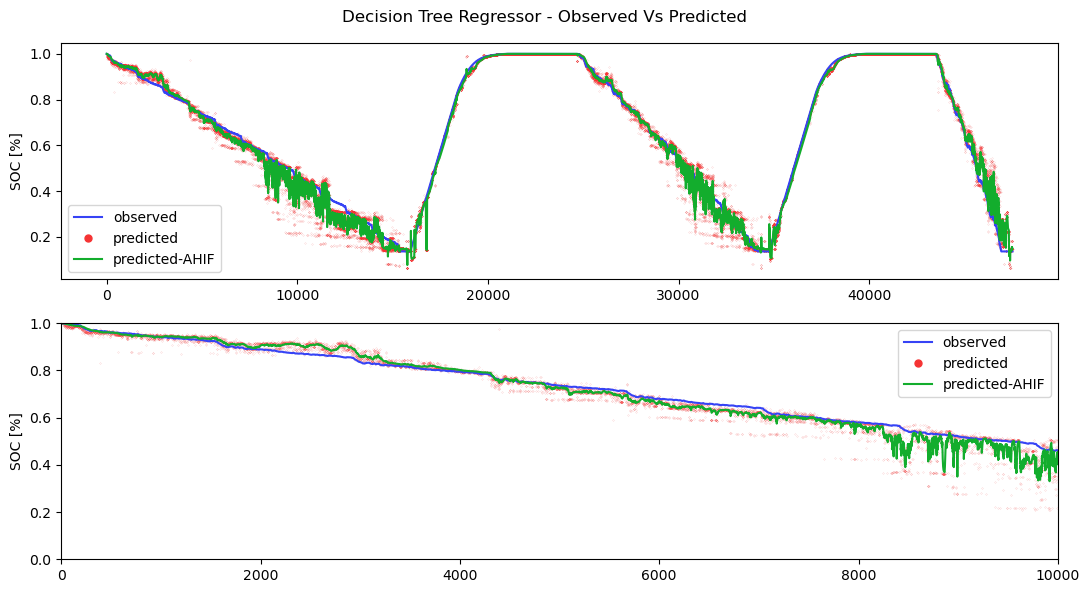

In [53]:
utils.results_plot(
    x=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    y_predicted=y_predicted,
    y_predicted_ahif=y_predicted_ahif,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='', 
    ylabel='SOC [%]', 
    title='Decision Tree Regressor - Observed Vs Predicted'
)

# K-Nearest Neighbors Regression

**K-Nearest Neighbors Regression (KNN)** is a **Machine Learning technique** used for **regression problems**.  

### How it Works:
1. **Problem Definition:**  
    - Start with a dataset containing **independent variables (features)** and a **numeric dependent variable (target)**.  
    - The goal is to predict the value of the **target** for new data points.  

2. **Neighbor Selection:**  
    - For a new data point, **KNN regression** identifies the \( K \) closest points in the training dataset.  
    - Distance is typically calculated using **Euclidean distance**:
$
d(x, x') = \sqrt{\sum_{i=1}^{n} (x_i - x'_i)^2}
\ $

3. **Aggregation of Results:**  
    - The predicted value for the new point is the **average** (or sometimes a weighted average) of the values of the nearest neighbors:
$ 
\hat{y} = \frac{1}{K} \sum_{i=1}^{K} y_i
\ $
    - $ K  $→ Number of nearest neighbors  
    - $ y_i  $→ Target values of the \( K \) neighbors  

4. **Choice of K:**  
    - $ K $ is a **hyperparameter** that requires careful selection.  
    - A **low $ K $** value → model is sensitive to noise.  
    - A **high $ K $** value → model becomes too general, losing important details.  
    - The optimal value of \( K \) is often selected using **cross-validation** techniques.  

### Visualization:
<div style="text-align: center;">
    <img src="./images/knnregression.png" alt="KNN Regression" width="700"/>
</div>


In [54]:
from sklearn import neighbors

nnregression_model = neighbors.KNeighborsRegressor(n_neighbors=5)
nnregression_model.fit(
    X=X_train, 
    y=y_train
)

KNeighborsRegressor()

In [55]:
nnregression_model_name = 'nnregression_model.sav'
models_dir = './models'
nnregression_model_path = os.path.join(models_dir, nnregression_model_name)

'''
Save the trained K-Nearest Neighbors Regression model to a file.
'''
pickle.dump(nnregression_model, open(nnregression_model_path, 'wb'))

<h2>K-Nearest Neighbors Regression model Loading and Testing</h2>
<p>
    For testing the trained model, it is necessary to load model properly.
</p>

In [56]:
nnregression_model_name = 'nnregression_model.sav'
models_dir = './models'
nnregression_model_path = os.path.join(models_dir, nnregression_model_name)

nnregression_model = pickle.load(open(nnregression_model_path, 'rb'))

<p>
    For making predictions, it is necessary invoke the predict() method and then invoke AHIF to smooth model output data.
</p>

In [57]:
# y_predicted = nnregression_model.predict(X_test)
# y_predicted_ahif = ahif.apply(
#     data=y_predicted
# )

In [58]:
# Flatten predictions to 1D array
y_predicted = nnregression_model.predict(X_test).flatten()

# Apply AHIF
y_predicted_ahif = ahif.apply(data=y_predicted.tolist())


<p>
    The model predictions evaluation is performed through score() method. Furthermore, the accuracy value is displayed.
</p>

In [59]:
result = nnregression_model.score(X_test, y_test)
print("Accuracy: %.2f%%" % (result*100.0))

Accuracy: 98.78%


In [60]:
nnregression_metrics = utils.get_metrics(y_test, y_predicted_ahif)
metrics.append(nnregression_metrics[0])
nnregression_metrics[1]

,Metric,Value
0,max_error,0.174067
1,mean_absolute_error,0.017985
2,mean_absolute_percentage_error,0.049050
3,mean_squared_error,0.000781
4,root_mean_squared_error,0.027946
5,root_mean_squared_log_error,0.020337


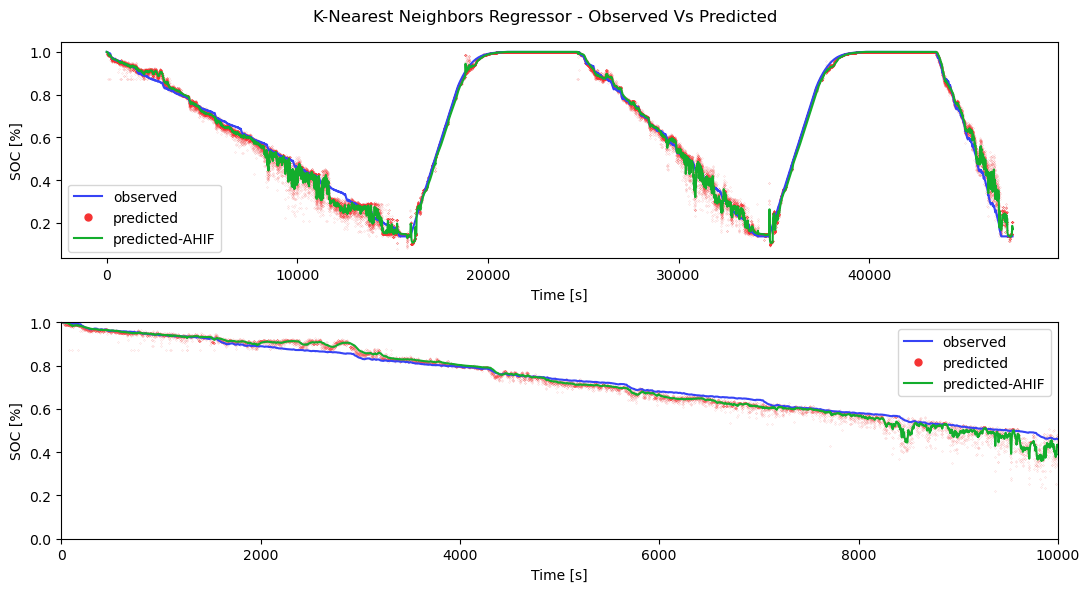

In [61]:
utils.results_plot(
    x=np.arange(0, len(y_test), 1), 
    y_observed=y_test, 
    y_predicted=y_predicted,
    y_predicted_ahif=y_predicted_ahif,
    xlim=[0,10000],
    ylim=[0,1],
    xlabel='Time [s]', 
    ylabel='SOC [%]', 
    title='K-Nearest Neighbors Regressor - Observed Vs Predicted'
)

# 📊 Metrics Comparison Among FNN, Linear Regression, Decision Tree Regression, and K-Nearest Neighbors Regression

The **🏅 best model** in terms of accuracy (minimum error) is the **K-Nearest Neighbors Regression** model, as it achieves the lowest error values:  
- 🔥 **Max Error (MA)**: 17.4%  
- ✅ **Mean Absolute Error (MAE)**: 1.8%  
- 📉 **Mean Absolute Percentage Error (MAPE)**: 4.9%  
- ⚙️ **Mean Squared Error (MSE)**: 0.1%  
- 📊 **Root Mean Squared Error (RMSE)**: 2.8%  
- 📈 **Root Mean Squared Log Error (RMSLE)**: 2%  

💡 It is important to note that this model is **fixed**, meaning its accuracy can only be improved by:  
- 🔧 **Increasing the amount of training data**  
- 🔢 **Choosing a different value of K**  
    - Increasing **K** makes the model more generalized, potentially losing significant details.  

In this context, the **🤖 MLP-FNN (Multi-Layer Perceptron - Feedforward Neural Network)** could be considered a **better model** despite having a higher error value. This is because it offers **greater flexibility for modification**.  

🔧 **Key tuning options** for MLP-FNN include:  
- ⏱️ **Increasing the number of epochs**  
- 🛠️ **Adding more hidden layers**  
- 🔥 **Choosing a different type of activation units**  
- ⚡ **Increasing the number of neurons**  
- 🚀 **Applying a different optimization function**  
- 🔥 **Using a different decay function for the learning rate**  

✅ This flexibility makes **MLP-FNN** more adaptable for performance improvements compared to **K-Nearest Neighbors Regression**. 🚀


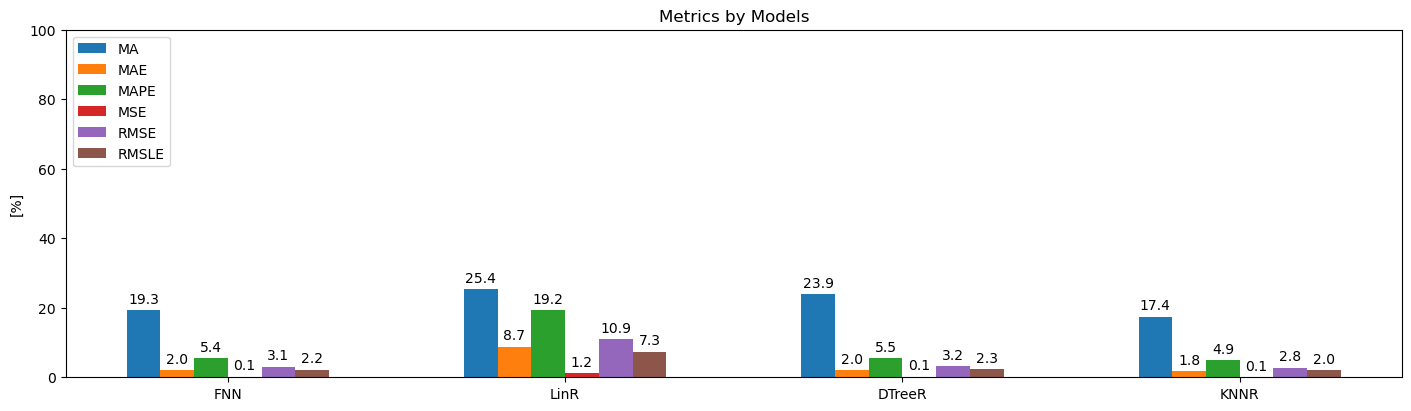

In [62]:
import utils
utils.metrics_plot(
    models_names=['FNN', 'LinR', 'DTreeR', 'KNNR'],
    metrics_names=['MA', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSLE'],
    #metrics_names = ['MA', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSLE','MSLE', 'R2', 'Huber', 'MedAE', 'Explained_variance','F1', 'Precision', 'Recall', 'AUC', 'Log_loss'],

    metrics_values=metrics
)

# Explainable Artificial Intelligence (XAI)

Considering **MLP-FNN** as the best model, we proceed to **interpret the trained model**.  
**Explainable Artificial Intelligence (XAI)** focuses on developing techniques that make **machine decisions understandable and transparent** to humans.  
The goal is to **improve the confidence and reliability** of AI models by providing clear explanations of how and why certain predictions or decisions were made.

### Visualization:
<div style="text-align: center;">
    <img src="./images/xai.jpg" alt="XAI" width="500"/>
</div>

---

### 🔥 **SHAP (SHapley Additive exPlanations)**:
- **SHAP** is a technique within XAI, based on **Shapley values** from **game theory**, which quantifies the contribution of each feature to the model’s prediction.  
- It assigns a **SHAP value** to each feature, representing its impact on the prediction.

### **SHAP Formula:**
$
\phi_i = \sum_{S \subseteq F \setminus \{i\}} \frac{|S|!(|F| - |S| - 1)!}{|F|!} \big( f(S \cup \{i\}) - f(S) \big)
\ $
Where:
- $ \phi_i $ → SHAP value for feature \( i \)  
- $ F $ → Set of all features  
- $ S $ → Subset of features excluding \( i \)  
- $ f(S) $ → Model prediction for the subset \( S \)  

### Visualization:
<div style="text-align: center;">
    <img src="./images/shap1.png" alt="SHAP" width="500"/>
</div>


In [63]:
import shap

In [64]:
'''
shap.sample: Sample a subset of the test data for faster SHAP value computation
shap.KernelExplainer: Initialize the SHAP KernelExplainer with the model's prediction function and sampled data
explainer.shap_values: Compute SHAP values for the sampled test data
np.squeeze: Convert the SHAP values to a numpy array, removing any singleton dimensions
'''

X_test_sampled = shap.sample(X_test, 100)
explainer = shap.KernelExplainer(fnn_model.predict, X_test_sampled)
shap_values = explainer.shap_values(X_test_sampled)
shap_values = np.squeeze(shap_values)

4/4 [==============================] - 0s 2ms/step


  0%|          | 0/100 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step
INFO:shap:num_full_subsets = 2
94/94 [==============================] - 0s 977us/step
INFO:shap:np.sum(w_aug) = 5.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = array([ 0.09219363,  0.06342136, -0.00232332, -0.0749771 ,  0.05819084])
1/1 [==============================] - 0s 17ms/step
INFO:shap:num_full_subsets = 2
94/94 [==============================] - 0s 1ms/step
INFO:shap:np.sum(w_aug) = 5.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = array([-0.03686443,  0.0774555 ,  0.00140166, -0.06237283,  0.04323723])
1/1 [==============================] - 0s 16ms/step
INFO:shap:num_full_subsets = 2
94/94 [==============================] - 0s 1ms/step
INFO:shap:np.sum(w_aug) = 5.0
INFO:shap:np.sum(self.kernelWeights) = 1.0000000000000002
INFO:shap:phi = array([-0.17212095, -0.09006918, -0.00115919, -0.0772193 , -0.13731591])
1/1 [==============================] - 0s 17ms/step
INFO:sh

# SHAP Value Calculation Breakdown

### 1. **Sampling the Test Data:**
- `shap.sample(X_test, 100)` → Samples a **subset of 100 data points** from `X_test` to speed up calculations.  
- This **sampled data** is used by the **KernelExplainer** to calculate SHAP values efficiently.

---

### 2. **KernelExplainer Technique:**
- The **KernelExplainer** uses a **kernel-based technique** to determine the effect of features on the model's predictions.  
- It evaluates **all possible feature combinations** in complete subsets to determine how much each feature contributes.  
- In practice:
$
\text{SHAP value} = \text{Effect of adding/removing a feature from the model output}
\ $

---

### 3. **Full Subset Calculation:**
- `num_full_subsets = 2` → Specifies that **2 complete subsets** were used for SHAP value calculation.  
- This means the SHAP calculation considered **two complete feature combinations** when estimating the feature contributions.


In [65]:
'''
Initialize JavaScript visualization for SHAP.
'''
shap.initjs()

In [66]:
features = list(test_data_df.columns)
target = [features.pop(-1)]
print(f'features = {features}')
print(f'target = {target}')

features = ['V', 'I', 'Temp', 'V_avg', 'I_avg']
target = ['SOC']


In [67]:
shap_values[0]

array([ 0.09219363,  0.06342136, -0.00232332, -0.0749771 ,  0.05819084])

# SHAP Waterfall Plot Interpretation

In the waterfall plot above:
- The **x-axis** represents the values of the target (dependent) variable, which is the **State of Charge (SOC)**.  
- \( x \) is the **chosen observation**,  
- \( f(x) \) is the **predicted value** of the model for the given input \( x \),  
- \( E[f(x)] \) is the **expected value** of the target variable, i.e., the **mean of all predictions**:
   $ 
\text{mean}\big(\text{model.predict}(X)\big)
\
$
    


  



### SHAP Values:
- Each bar length represents the **SHAP value** of a feature for this observation.
- The SHAP values indicate how much each feature contributes to pushing the model's prediction higher or lower than the expected value.  
    - **I_avg** → \( +0.09 \)  
    - **V_avg** → \( -0.08 \)  
    - **V** → \( +0.05 \)  
    - **I** → \( -0.03 \)  
    - **Temp** → \( +0.01 \)  

### Key Insights:
- The **sum of all SHAP values** equals \( E[f(x)] - f(x) \).  
- The **absolute SHAP values** reveal the magnitude of each feature's influence:
    - **I_avg** contributed the most,  
    - **V_avg** the second most,  
    - **V** the third,  
    - **I** the fourth,  
    - **Temp** had the **lowest contribution** to the prediction.


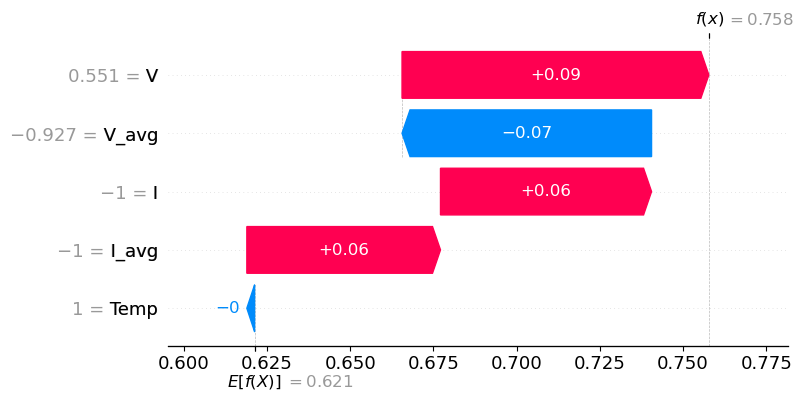

In [68]:
'''
Create a SHAP Explanation object for the selected sample, generate and display a SHAP waterfall plot for the selected sample x.
'''
x = 0
shap_explanation = shap.Explanation(
    values=shap_values[x],
    base_values=explainer.expected_value,
    data=X_test_sampled[x],
    feature_names=features
)
shap.plots.waterfall(shap_explanation)

# SHAP Values Interpretation

- The **SHAP values** shown are **valid for this observation only**.  
- With other data points, the SHAP values will **change**.  
- To understand the **global importance** or contribution of features across the entire dataset, you can use:
    - A **bee swarm plot**  
    - `summary_plot()` from the SHAP library  

### Example Insight:
- High values of $ \text{I}_{\text{avg}} $ have a **high negative contribution** to the prediction,  
- Low values of $ \text{I}_{\text{avg}} $ have a **high positive contribution**.  
- The **Temp** feature has **minimal contribution**, regardless of whether its values are high or low.
  

### Global Feature Importance:
- All variables are displayed in order of **global feature importance**:  
    - The **first feature** is the most important,  
    - The **last feature** is the least important.


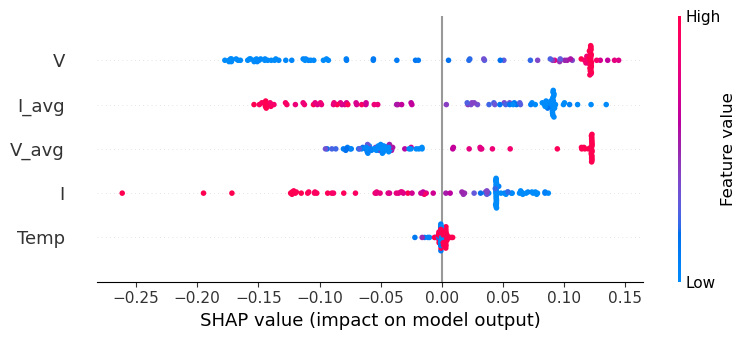

In [69]:
'''
Generate and display a SHAP summary plot for the sampled test data.
'''
shap.summary_plot(shap_values, X_test_sampled, feature_names=features)

In [70]:
nnregression_metrics[1]

,Metric,Value
0,max_error,0.174067
1,mean_absolute_error,0.017985
2,mean_absolute_percentage_error,0.049050
3,mean_squared_error,0.000781
4,root_mean_squared_error,0.027946
5,root_mean_squared_log_error,0.020337


In [71]:
decisiontree_metrics[1]

,Metric,Value
0,max_error,0.238836
1,mean_absolute_error,0.019529
2,mean_absolute_percentage_error,0.054558
3,mean_squared_error,0.001005
4,root_mean_squared_error,0.031709
5,root_mean_squared_log_error,0.023331


In [72]:
fnn_metrics[1]

,Metric,Value
0,max_error,0.192974
1,mean_absolute_error,0.020048
2,mean_absolute_percentage_error,0.054382
3,mean_squared_error,0.000935
4,root_mean_squared_error,0.030575
5,root_mean_squared_log_error,0.021900


In [73]:
lregression_metrics[1]

,Metric,Value
0,max_error,0.253888
1,mean_absolute_error,0.087461
2,mean_absolute_percentage_error,0.192346
3,mean_squared_error,0.011819
4,root_mean_squared_error,0.108715
5,root_mean_squared_log_error,0.073253


In [74]:
matrix=[fnn_metrics[0],lregression_metrics[0],decisiontree_metrics[0],nnregression_metrics[0]]
matrix

[[0.19297360482017256,
  0.020047769234468004,
  0.05438220830793552,
  0.0009348168785987546,
  0.03057477520111562,
  0.021899908911591198],
 [0.25388765630701343,
  0.08746141574131439,
  0.19234622641686333,
  0.01181886887450625,
  0.1087146212544856,
  0.07325250867247318],
 [0.23883559208755892,
  0.019528650363614338,
  0.054557811764273045,
  0.00100548153649316,
  0.0317093288559244,
  0.023331375420716942],
 [0.17406652574271808,
  0.017984695995174823,
  0.04905042134701136,
  0.0007809875167727408,
  0.02794615388157628,
  0.02033678030354547]]

In [79]:

from tabulate import tabulate

dffff = pd.DataFrame(matrix, columns=["max_error", "mean_absolute_error", "mean_absolute_percentage_error", "mean_squared_error", "root_mean_squared_error", "root_mean_squared_log_error"])

dffff.insert(0, "Algorithm", ["Feed-Forward Neural Network", "Linear Regression","Decision Tree","K-Nearest Neighbour"])
dffff

,Algorithm,max_error,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,root_mean_squared_error,root_mean_squared_log_error
0,Feed-Forward Neural Network,0.192974,0.020048,0.054382,0.000935,0.030575,0.021900
1,Linear Regression,0.253888,0.087461,0.192346,0.011819,0.108715,0.073253
2,Decision Tree,0.238836,0.019529,0.054558,0.001005,0.031709,0.023331
3,K-Nearest Neighbour,0.174067,0.017985,0.049050,0.000781,0.027946,0.020337


## Using Tabulate

In [80]:
# Print the table
print(tabulate(dffff, tablefmt="grid", headers=["Algorithm","max_error", "mean_absolute_error", "mean_absolute_percentage_error", "mean_squared_error", "root_mean_squared_error", "root_mean_squared_log_error"]))

+----+-----------------------------+-------------+-----------------------+----------------------------------+----------------------+---------------------------+-------------------------------+
|    | Algorithm                   |   max_error |   mean_absolute_error |   mean_absolute_percentage_error |   mean_squared_error |   root_mean_squared_error |   root_mean_squared_log_error |
+====+=============================+=============+=======================+==================================+======================+===========================+===============================+
|  0 | Feed-Forward Neural Network |    0.192974 |             0.0200478 |                        0.0543822 |          0.000934817 |                 0.0305748 |                     0.0218999 |
+----+-----------------------------+-------------+-----------------------+----------------------------------+----------------------+---------------------------+-------------------------------+
|  1 | Linear Regression           

In [81]:
print(dffff.columns)


Index(['Algorithm', 'max_error', 'mean_absolute_error',
       'mean_absolute_percentage_error', 'mean_squared_error',
       'root_mean_squared_error', 'root_mean_squared_log_error'],
      dtype='object')


## Using Seaborn

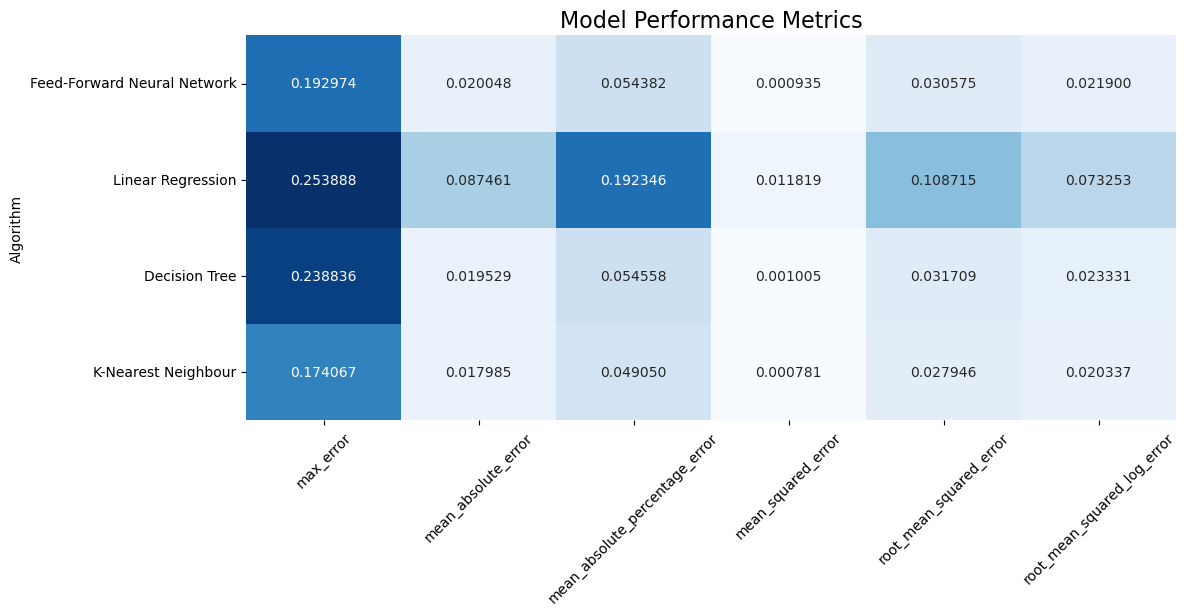

In [82]:
import seaborn as sns
# Plotting the table using seaborn heatmap
fig, ax = plt.subplots(figsize=(12, 5))

# Use heatmap to display the table
sns.heatmap(dffff.set_index("Algorithm"), annot=True, fmt=".6f", cmap="Blues", cbar=False)

plt.title("Model Performance Metrics", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()